# First order necessary conditions

## Background: Taylor's theorem

Let $k \ge 1$ be an integer and let the function $f : \mathbb{R} \rightarrow \mathbb{R}$ be $k$ times differentiable at the point $a \in \mathbb{R}$. Then there exists a function $h(k) : \mathbb{R} \rightarrow \mathbb{R}$ such that
$$f(x)=f(a)+f'(a)(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+\cdots +{\frac {f^{(k)}(a)}{k!}}(x-a)^{k}+h_{k}(x)(x-a)^{k}$$
and
$${\lim _{x\to a}h_{k}(x)=0}$$

This means that as we approach the point $a$, the approximation error $h_{k}(x)(x-a)^{k}$ becomes 0, i.e., we get close to the value of $f(x)$.

Consider the function
$$
f(x) = \dfrac{1}{1+x^2}
$$

its $k$ th order approximations at $a_1=0$ and $a_2=1$ are shown below

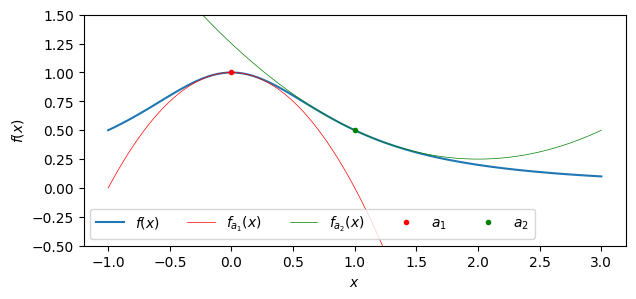

In [99]:
import sympy as sym
from sympy import lambdify
import matplotlib.pyplot as plt
import numpy as np
import math

x = sym.Symbol('x')
f = 1/(1+x**2)

# plot values
x_plot = np.linspace(-1,3,100)
f_plot = lambdify(x, f, modules=['numpy'])

# parameters
k = 2
a1 = 0
a2 = 1

# function approximation
fa_1 = 0; fa_2 = 0
for i in range(k+1): 
    fk = sym.diff(f, x, i)
    fk_plot = lambdify(x, fk, modules=['numpy'])
    fa_1 += (fk_plot(a1)/math.factorial(i)) * ((x_plot - a1) ** i)
    fa_2 += (fk_plot(a2)/math.factorial(i)) * ((x_plot - a2) ** i)

# plotting
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x_plot, f_plot(x_plot),label='$f(x)$')
ax.plot(x_plot,fa_1,'-r',linewidth=0.5,label='$f_{a_1}(x)$')
ax.plot(x_plot,fa_2,'-g',linewidth=0.5,label='$f_{a_2}(x)$')
ax.plot(a1,f_plot(a1),'.r',label='$a_1$')
ax.plot(a2,f_plot(a2),'.g',label='$a_2$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim((-0.5,1.5))
# ax.set_title('taylor series approximation of $f(x)=\dfrac{1}{1+x^2}$')
ax.legend(ncol=5,loc='lower left');
fig.savefig('k%i_approximation.pdf' %(k),format='pdf', dpi=200, bbox_inches='tight')

What can you say about the point $a_1=0$ when looking at the **first** order approximation ($k=1$)?

*It is clearly a stationary point since the slope of the approximation $f^1_{a_1}(x)$ is $0$.*

What can you say about the point $a_1=0$ when looking at the **second** order approximation ($k=2$)?

*It is a maximizer since the quadratic approximation $f^2_{a_1}(x)$ is concaving downwards*